# Histogram and Intensity Transformations¶

Pixel Transforms are operations you perform one pixel at a time. In this lab, you will start by creating histograms. Histograms display the intensity of the image and can be used to optimize image characteristics. You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness. In the last portion of the lab, you will use thresholding to segment objects from images.
<br>
Pixel Transforms<br>
Histograms<br>
Intensity Transformations<br>
Thresholding and Simple Segmentation

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [4]:
#helper function

In [5]:
def plot_image(image_1, image_2, title_1 = "Original", title_2 = "new Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1, cmap = 'gray')
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2, cmap = 'gray')
    plt.title(title_2)
    plt.show()

In [6]:
#histogram side by side

In [7]:
def plot_hist(old_image, new_image, title_old="Original", title_new = "New Image"):
    intensity_values = np.array([x for x in range(256)])
    plt.subplot(1,2,1)
    plt.bar(intensity_values, cv2.calcHist([old_image], [0],None,[256],[0,256])[:0], width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1,2,2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:0], width = 5)
    plt.title('title_new')
    plt.xlabel('intensity')
    plt.show()

# Histograms
A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use cv.calcHist() to generate the histogram. Here are the parameter values:

cv2.calcHist(CV array:[image] this is the image channel:[0],for this course it will always be [None],the number of bins:[L],the range of index of bins:[0,L-1]) 

For real images, L is 256.


# Toy Example
Consider the toy array with intensity values ranging from 0 to 2. We can create a histogram. Its first element is the number of zeros in the image (in this case, 1); its second element is the number of ones in the image (in this case, 5), and so on.

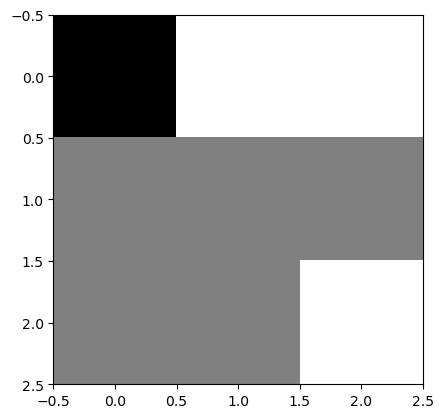

toy image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [9]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]], dtype = np.uint8)
plt.imshow(toy_image, cmap='gray')
plt.show()
print('toy image:', toy_image)

We can use the caclHist function, in this case, we use only three bins as there are only three values, and the index of the bins are from 1 to 3.

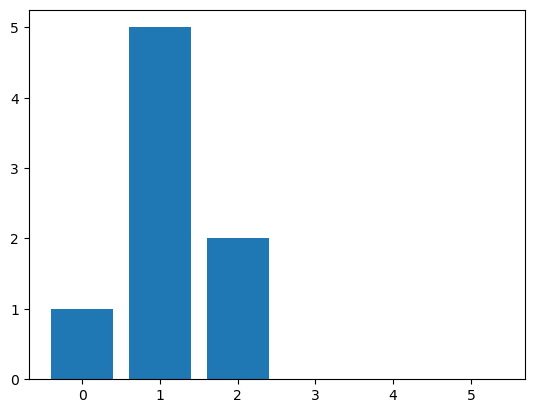

In [10]:
plt.bar([x for x in range(6)], [1,5,2,0,0,0])
plt.show()

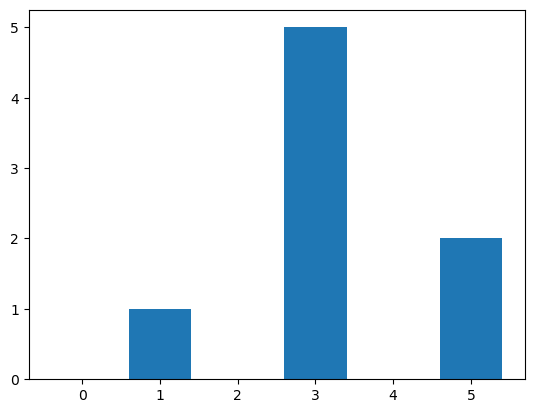

In [11]:
plt.bar([x for x in range(6)], [0,1,0,5,0,2])
plt.show()

# Gray Scale Histograms
Histograms are used in grayscale images. Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Consider the following "Gold Hill" image:

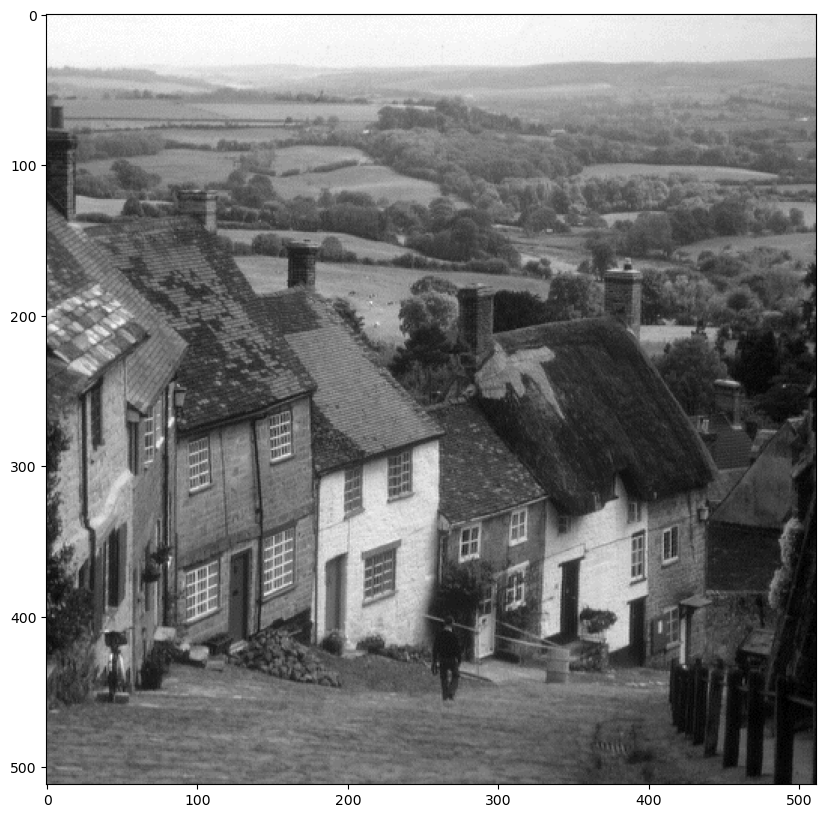

In [12]:
goldhill = cv2.imread("goldhill.bmp", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill, cmap='gray')
plt.show()

In [18]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0,256])


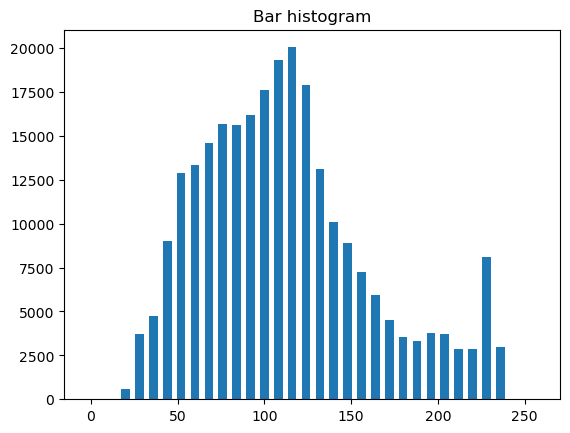

In [14]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width=5)
plt.title("Bar histogram")
plt.show()

The histogram is a function where  ℎ[𝑟]
  where  𝑟∈0,1,..,255
 .

We can convert it to a probability mass function by normalizing it by the number of pixels:

In [15]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

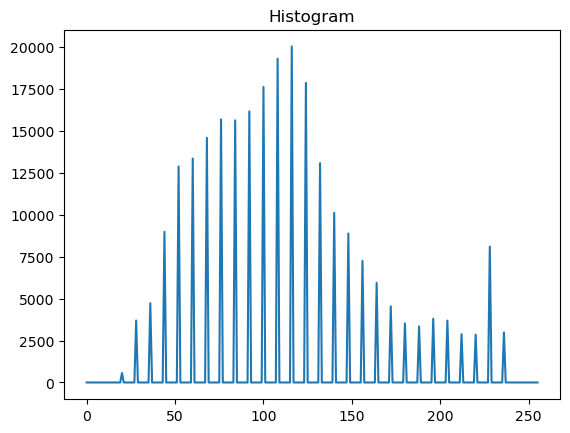

In [16]:
plt.plot(intensity_values, hist)
plt.title('Histogram')
plt.show()

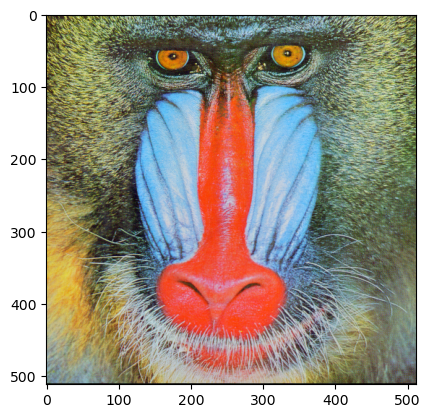

In [19]:
baboon = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

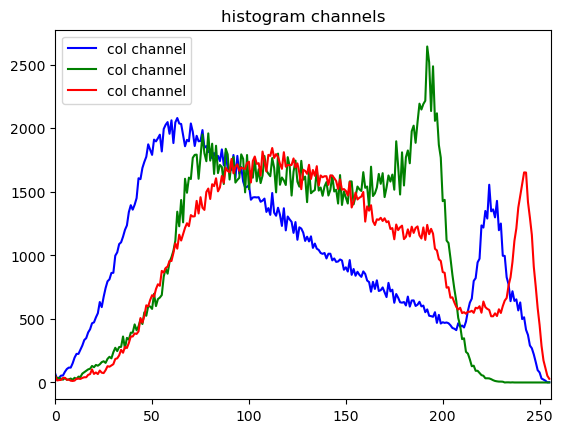

In [20]:
color = ('blue', 'green', 'red')
for i, col in enumerate(color):
    histr = cv2.calcHist([baboon], [i], None, [256], [0,256])
    plt.plot(intensity_values, histr, color = col, label ='col' + " channel")
    
    plt.xlim([0,256])
    
plt.legend()
plt.title("histogram channels")
plt.show()

# Intensity Transformations
It's helpful to think of an image as a function  𝑓(𝑥,𝑦)
  instead of an array at this point, where x is the row index and y is the column index. You can apply a transformation  𝑇
  to the image and get a new image:
𝑔(𝑥,𝑦)=𝑇(𝑓(𝑥,𝑦))
 
An Intensity Transformation depends on only one single point  (𝑥,𝑦)
 . For example, you can apply a linear transform  𝑔(𝑥,𝑦)=2𝑓(𝑥,𝑦)+1
 ; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if  𝑟
  is the gray level intensity, similar to the histogram values. The new output s is given by:

𝑠=𝑇(𝑟)

# Image Negatives
Consider an image with  𝐿
  intensity values ranging from  [0,𝐿−1]
 . We can reverse the intensity levels by applying the following:
𝑔(𝑥,𝑦)=𝐿−1−𝑓(𝑥,𝑦)
 
Using the intensity transformation function notation
𝑠=𝐿−1−𝑟
 
This is called the image negative. For  𝐿=256
  the formulas simplifys to:
𝑔(𝑥,𝑦)=255−𝑓(𝑥,𝑦)and𝑠=255−𝑟
 
We can perform intensity transformation on the toy image where  𝐿=3
 :

In [21]:
neg_toy_image = 255 - 1*toy_image

print("toy image\n", neg_toy_image)
print("image negative\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negative
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


We see darker intensity’s become brighter and brighter become darker, middle intensity’s remain the same.

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(toy_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(neg_toy_image, cmap='gray')
plt.show()